In [1]:
import numpy as np

## Logistic / Sigmoid function

$$ y = \frac{1}{1+e^{-z}} $$

In [2]:
def sigmoid(z):
    y = 1/(1 + np.exp(-1*z))
    return y

In [3]:
sigmoid(0)

0.5

In [4]:
sigmoid(10)

0.9999546021312976

In [5]:
sigmoid(-5)

0.0066928509242848554

In [6]:
import matplotlib.pyplot as plt

In [7]:
z = np.linspace(-5,5,100)

In [8]:
y = sigmoid(z)

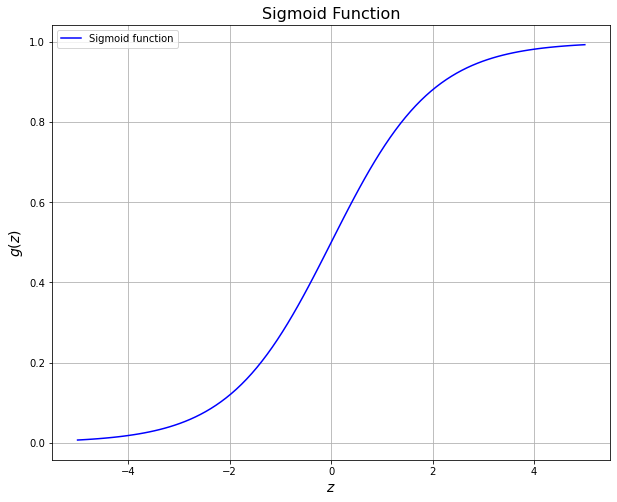

In [10]:
plt.figure(figsize=(10,8))
plt.plot(z, y, 'b-', label="Sigmoid function")
plt.grid()
plt.title("Sigmoid Function", fontsize=16)
plt.xlabel("$z$", fontsize=14)
plt.ylabel("$g(z)$", fontsize=14)
plt.legend()
plt.show()

## Derivative of logistic / sigmoid function

if $g(z) = \frac{1}{1+e^{-z}} $

then $ g'(z) = \frac{dg(z)}{dz} = g(z)(1- g(z)) $

In [11]:
def derivative_of_sigmoid(z):
    g = sigmoid(z)
    return g*(1-g)

In [14]:
d = derivative_of_sigmoid(z)

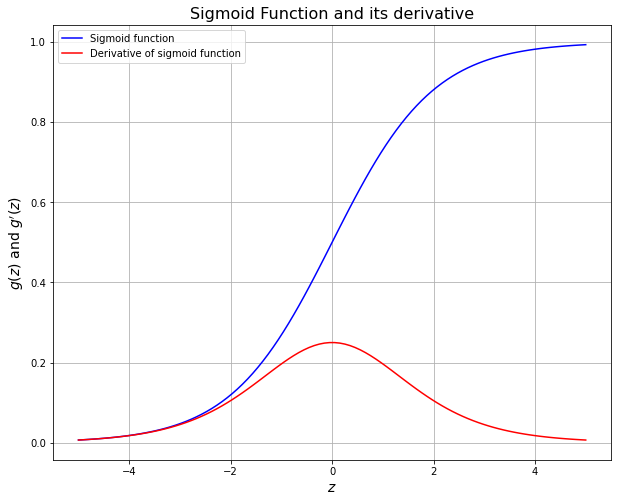

In [15]:
plt.figure(figsize=(10,8))
plt.plot(z, y, 'b-', label="Sigmoid function")
plt.plot(z, d, 'r-', label="Derivative of sigmoid function")
plt.grid()
plt.title("Sigmoid Function and its derivative", fontsize=16)
plt.xlabel("$z$", fontsize=14)
plt.ylabel("$g(z)$ and $g'(z)$", fontsize=14)
plt.legend()
plt.show()

## Cost function

First we shall create a classification dataset and based on that we shall observe the performance of cost functions

In [23]:
from sklearn.datasets import make_classification
import pandas as pd

In [25]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, shuffle=True)

In [32]:
dataset = pd.DataFrame(np.hstack((X, y.reshape(-1,1))), columns=['x1', 'x2', 'target'])

In [33]:
dataset.head(10)

,x1,x2,target
0,-0.978734,-0.668084,1.0
1,-0.701797,-0.735363,1.0
2,1.553806,0.375784,0.0
3,-0.326803,-1.217648,1.0
4,1.172745,0.224068,0.0
5,1.041202,1.753753,0.0
6,-0.943546,-0.241972,1.0
7,-0.586737,-1.114895,1.0
8,1.280972,1.102172,0.0
9,-0.295969,3.348339,0.0


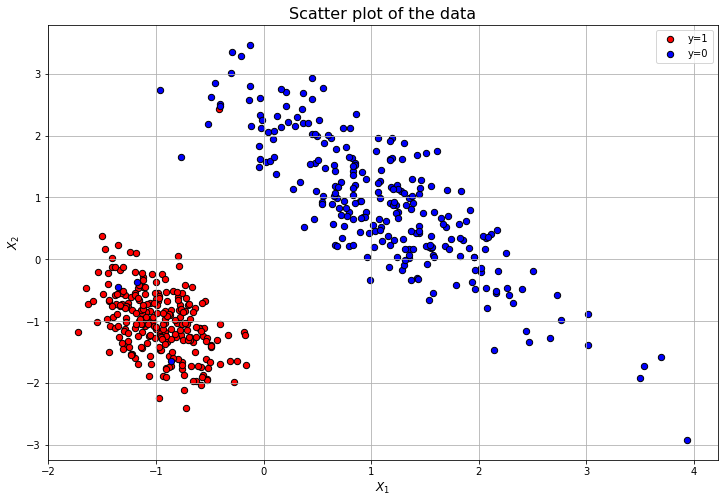

In [39]:
plt.figure(figsize=(12,8))
data_1 = dataset[dataset['target']==1]
data_0 = dataset[dataset['target']==0]
plt.scatter(x=data_1['x1'].values, y=data_1['x2'].values, s=40, c='r', edgecolor='k', label="y=1")
plt.scatter(x=data_0['x1'].values, y=data_0['x2'].values, s=40, c='b', edgecolor='k', label="y=0")
plt.title("Scatter plot of the data",fontsize=16)
plt.xlabel("$X_1$", fontsize=12)
plt.ylabel("$X_2$", fontsize=12)
plt.grid()
plt.legend()
plt.show()

### Why not to use mean squared error cost function

In [42]:
def mse_cost(y_pred, y_actual):
    return 0.5*np.mean(np.square(np.array(y_pred) - np.array(y_actual)))

The hypostheis function will look like:

$$ y_p = h_{\theta}(x) = g\left(\theta_0 + \sum_{j=1}^{k}\theta_k x_k \right) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2) $$

Where $g(z) = \frac{1}{1+e^{-z}}$

*Suppose*

$\theta_1 = \theta_2 = 1$

and $\theta_0$ is variable between -5 to +5

In [47]:
X = np.hstack((np.ones((len(X), 1)), X))

In [49]:
theta_0_values = np.linspace(-5, 5, 100)

In [50]:
theta_1 = 1
theta_2 = 1

In [51]:
theta = np.array([-2,1,1]).reshape(-1,1)

In [57]:
mse_costs = []

for i in range(len(theta_0_values)):
    theta_0 = theta_0_values[i]
    theta = np.array([theta_0, theta_1, theta_2]).reshape(-1,1)
    z_p = X @ theta
    y_p = sigmoid(z_p)
    cost = mse_cost(y_p, y)
    mse_costs.append(cost)

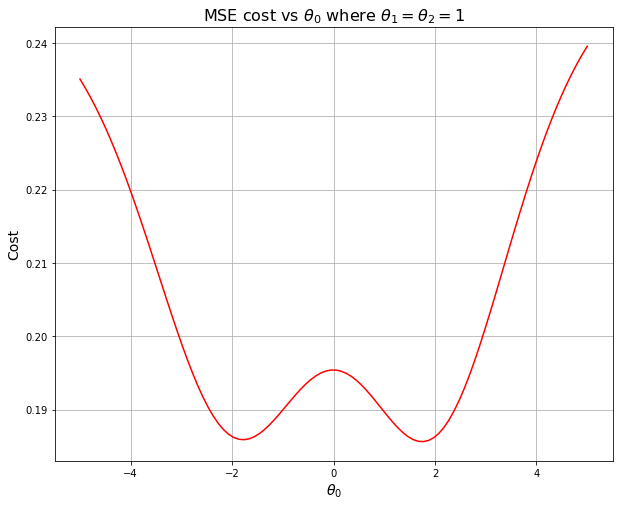

In [63]:
plt.figure(figsize=(10,8))
plt.plot(theta_0_values, mse_costs, 'r-')
plt.title("MSE cost vs $\\theta_0$ where $\\theta_1 = \\theta_2 = 1$", fontsize=16)
plt.xlabel("$\\theta_0$", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.grid()
plt.show()

As the MSE cost produces non-convex shape of cost function, hence we won't be using MSE cost function

### What if we use log-loss or binary cross entropy loss

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)}log(y^{(i)}_p) + (1-y^{(i)})log(1-y^{(i)}_p)\right)$$

In [70]:
def bce_loss(y_pred, y_actual):
    return (-1)*np.mean(y_actual * np.log(y_pred) + (1-y_actual)*np.log(1-y_pred))

In [72]:
bce_costs = []

for i in range(len(theta_0_values)):
    theta_0 = theta_0_values[i]
    theta = np.array([theta_0, theta_1, theta_2]).reshape(-1,1)
    z_p = X @ theta
    y_p = sigmoid(z_p)
    cost = bce_loss(y_p, y)
    bce_costs.append(cost)

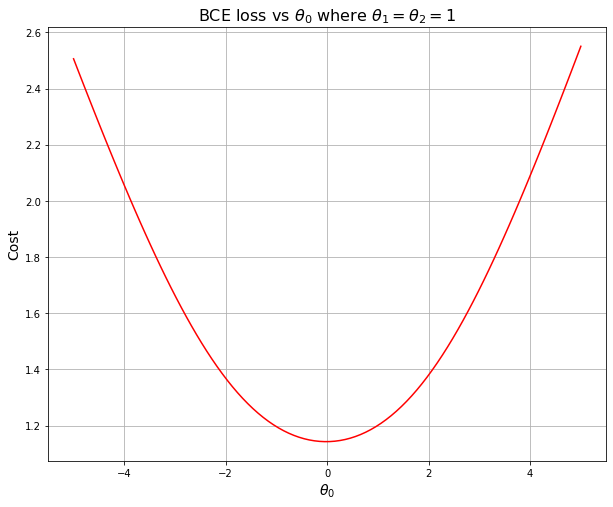

In [73]:
plt.figure(figsize=(10,8))
plt.plot(theta_0_values, bce_costs, 'r-')
plt.title("BCE loss vs $\\theta_0$ where $\\theta_1 = \\theta_2 = 1$", fontsize=16)
plt.xlabel("$\\theta_0$", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.grid()
plt.show()

**Observation**

Using BCE loss we can obtain a convex function of the loss and that can be minimed using gradient descent optimization.